In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

# KNN

In [3]:
knn_training_accuracy  = []  
knn_test_accuracy = []

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn_training_accuracy.append(f1_score(y_train, knn.predict(X_train),average='weighted'))
    knn_test_accuracy.append(f1_score(y_test, knn.predict(X_test),average='weighted'))

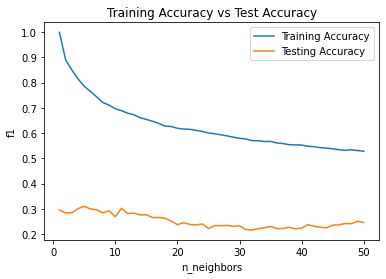

In [4]:
plt.figure()
plt.plot(range(1, 51), knn_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 51), knn_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


# DTC

In [5]:
dtc_training_accuracy  = []  
dtc_test_accuracy = []

for i in range(1, 31):
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(X_train, y_train)
    dtc_training_accuracy.append(f1_score(y_train, dtc.predict(X_train),average='weighted'))
    dtc_test_accuracy.append(f1_score(y_test, dtc.predict(X_test),average='weighted'))

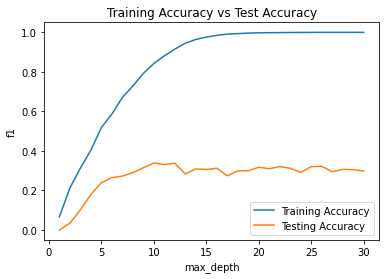

In [6]:
plt.figure()
plt.plot(range(1, 31), dtc_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 31), dtc_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


# RFC

In [7]:
rfc_training_accuracy  = []  
rfc_test_accuracy = []

for i in range(1, 31):
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train, y_train)
    rfc_training_accuracy.append(f1_score(y_train, rfc.predict(X_train),average='weighted'))
    rfc_test_accuracy.append(f1_score(y_test, rfc.predict(X_test),average='weighted'))

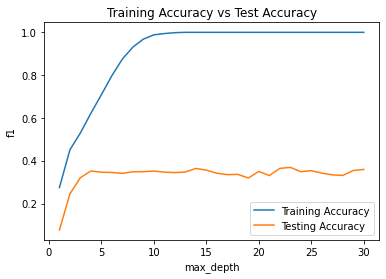

In [8]:
plt.figure()
plt.plot(range(1, 31), rfc_training_accuracy, label='Training Accuracy')
plt.plot(range(1, 31), rfc_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()


# SVC

In [9]:
print(1e-5)

1e-05


In [28]:
svc_training_accuracy  = []  
svc_test_accuracy = []

c_params = [1e-4,1e-3,1e-2,0.1,1,10,100,1000]

for i in range(len(c_params)):
    svc = SVC(C = c_params[i])
    svc.fit(X_train, y_train)
    svc_training_accuracy.append(f1_score(y_train, svc.predict(X_train),average='weighted'))
    svc_test_accuracy.append(f1_score(y_test, svc.predict(X_test),average='weighted'))

In [29]:
import numpy as np
np.log10(c_params)

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.])

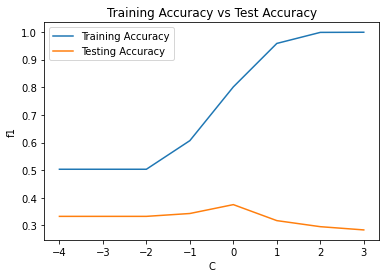

In [30]:
plt.figure()
plt.plot(np.log10(c_params), svc_training_accuracy, label='Training Accuracy')
plt.plot(np.log10(c_params), svc_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('C')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()

# MLP

In [22]:
mlp_training_accuracy  = []  
mlp_test_accuracy = []

i_params = [50*i for i in range(1,10)]
# print(i_params)
# i_params2 = [100, 200]
# print(i_params2)

for i in range(len(i_params)):
    mlp = MLPClassifier(max_iter = i_params[i])
    mlp.fit(X_train, y_train)
    mlp_training_accuracy.append(f1_score(y_train, mlp.predict(X_train),average='weighted'))
    mlp_test_accuracy.append(f1_score(y_test, mlp.predict(X_test),average='weighted'))

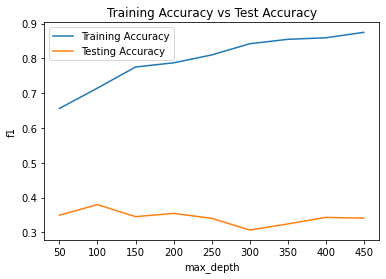

In [23]:
plt.figure()
plt.plot(i_params, mlp_training_accuracy, label='Training Accuracy')
plt.plot(i_params, mlp_test_accuracy, label='Testing Accuracy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.legend(loc='best')
plt.show()